In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

'2022.09.1'

In [3]:
from rdkit.Chem import AllChem as Chem

In [4]:
import pandas as pd
from rdkit.Chem import PandasTools

In [5]:
df = pd.read_csv('smiles.csv')

In [6]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')

In [7]:
print(type(df.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


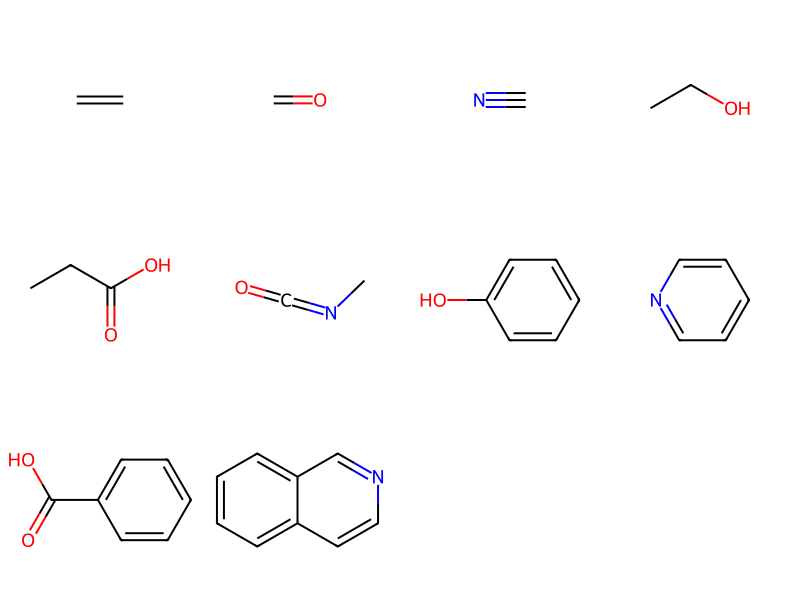

In [8]:
PandasTools.FrameToGridImage(df.head(10), molsPerRow=4)

In [9]:
from psikit import Psikit

In [10]:
%time
pk = Psikit()
pk.read_from_smiles("C=C")
print("Optimized SCF Energy: ", pk.optimize())

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.54 µs

  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.
Optimizer: Optimization complete!
Optimized SCF Energy:  -78.03876941256637


In [11]:
print(df.smiles)

0                 C=C
1                 C=O
2                 C#N
3                 CCO
4            CCC(=O)O
5              CN=C=O
6         c1cc(O)ccc1
7            c1ccncc1
8    c1cc(C(O)=O)ccc1
9      c1ccc2cnccc2c1
Name: smiles, dtype: object


In [12]:
%time
energy = []
for i in df.smiles:
    pk.read_from_smiles(i)
    energy_value = pk.optimize()
    print("Optimized SCF Energy for",i,": ", energy_value)
    energy.append(energy_value)


CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs
Optimizer: Optimization complete!
Optimized SCF Energy for C=C :  -78.03876941335801
Optimizer: Optimization complete!
Optimized SCF Energy for C=O :  -113.86953646696702
Optimizer: Optimization complete!
Optimized SCF Energy for C#N :  -92.87694247780213
Optimizer: Optimization complete!
Optimized SCF Energy for CCO :  -154.0899187072052
Optimizer: Optimization complete!
Optimized SCF Energy for CCC(=O)O :  -266.85898515758527
Optimizer: Optimization complete!
Optimized SCF Energy for CN=C=O :  -206.7955418291921
Optimizer: Optimization complete!
Optimized SCF Energy for c1cc(O)ccc1 :  -305.5732996845643
Optimizer: Optimization complete!
Optimized SCF Energy for c1ccncc1 :  -246.70419461581565
Optimizer: Optimization complete!
Optimized SCF Energy for c1cc(C(O)=O)ccc1 :  -418.340132094918
Optimizer: Optimization complete!
Optimized SCF Energy for c1ccc2cnccc2c1 :  -399.3597582052066


,smiles,ROMol,Energy
0,C=C,,-78.038769
1,C=O,,-113.869536
2,C#N,,-92.876942
3,CCO,,-154.089919
4,CCC(=O)O,,-266.858985
5,CN=C=O,,-206.795542
6,c1cc(O)ccc1,,-305.573300
7,c1ccncc1,,-246.704195
8,c1cc(C(O)=O)ccc1,,-418.340132
9,c1ccc2cnccc2c1,,-399.359758

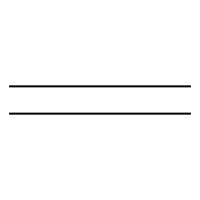
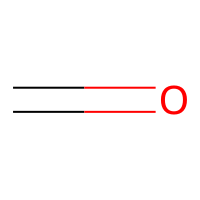
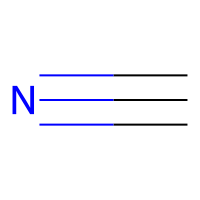
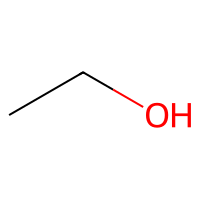
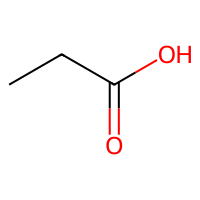
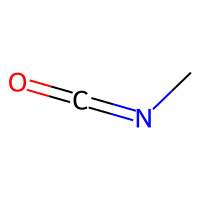
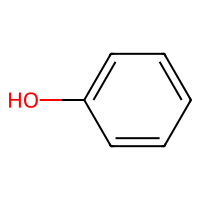
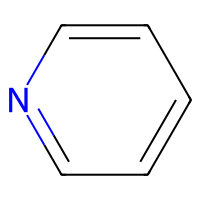
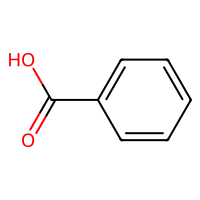
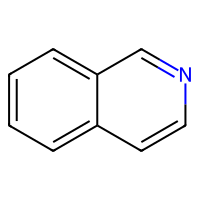

In [13]:
df.insert(2, "Energy", energy)
df